# Assignment 2 by: Janna Qian Zi Ng (s4160608)


# Data Sampling

In [1]:
#retrieve the data
import pandas as pd
winedf = pd.read_csv("A2data.csv", sep=",", decimal = ".", header = 0)

In [2]:
#check for missing values
rows_with_missing_values = winedf[winedf.isna().any(axis=1)]
rows_with_missing_values

,volatile_acidity,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
128,1.040,13.0,29.0,3.22,0.55,NaN,6.0
129,0.745,16.0,63.0,3.19,0.82,NaN,5.0
130,0.715,10.0,52.0,3.23,0.77,NaN,5.0
150,0.430,29.0,NaN,3.42,0.72,10.5,5.0
178,0.620,NaN,62.0,3.52,0.58,9.3,6.0
...,...,...,...,...,...,...,...
1436,0.630,18.0,30.0,3.40,0.75,NaN,5.0
1469,0.470,16.0,89.0,3.54,0.88,NaN,7.0
1470,0.500,48.0,82.0,3.16,0.75,NaN,5.0
1471,0.470,16.0,89.0,3.54,0.88,NaN,7.0


In [3]:
#remove missing values
wine_clean = winedf.dropna()

In [4]:
#check for duplicate data
duplicated_data = winedf.duplicated().sum()
print("Number of duplicates in the data: " + str(duplicated_data))

Number of duplicates in the data: 226


In [5]:
#sanity check for pH value (should be between 0 and 14)
invalid_ph_rows = winedf[(winedf['pH'] < 0) | (winedf['pH'] > 14)]

if not invalid_ph_rows.empty:
    print("Rows with invalid pH values:")
    print(invalid_ph_rows)
else:
    print("No invalid pH values found.")

No invalid pH values found.


In [6]:
#sanity check for wine quality (should be between 0 and 10)
invalid_quality_rows = winedf[(winedf['quality'] < 0) | (winedf['quality'] > 14)]

if not invalid_quality_rows.empty:
    print("Rows with invalid quality values:")
    print(invalid_quality_rows)
else:
    print("No invalid quality values found.")

No invalid quality values found.


In [7]:
#exploring the data
winedf['quality'].value_counts()

quality
5.0    650
6.0    609
7.0    193
4.0     53
8.0     17
3.0      9
Name: count, dtype: int64

In [8]:
#exploring the data
winedf.describe()

,volatile_acidity,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
count,1581.000000,1582.000000,1575.000000,1570.000000,1584.000000,1570.000000,1531.000000
mean,0.528083,15.838812,46.370159,3.311223,0.658529,10.423790,5.636839
std,0.178689,10.449841,32.831795,0.154989,0.170084,1.063567,0.809293
min,0.120000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,0.390000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,0.520000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,0.640000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,1.580000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


In [9]:
#taking a random sample of 200 instances for Task 1
# sample1 = wine_clean.sample(n=200, random_state=1)
# sample1.to_csv('s4160608-cleaned-A2SampleOne.csv', index=False)

In [10]:
#taking a random sample of 1000 instances for Task 2
# sample2 = wine_clean.sample(n=1000, random_state=2)
# sample2.to_csv('s4160608-cleaned-A2SampleTwo.csv', index=False)

In [11]:
#taking a random sample of 600 instances for Task 3
# sample3 = wine_clean.sample(n=600, random_state=3)
# sample3.to_csv('s4160608-cleaned-A2SampleThree.csv', index=False)

# Task 1: Regression


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#load the csv data from the file containing the sample for Task 1
data1 = pd.read_csv("s4160608-cleaned-A2SampleOne.csv", sep=",", decimal = ".", header = 0)

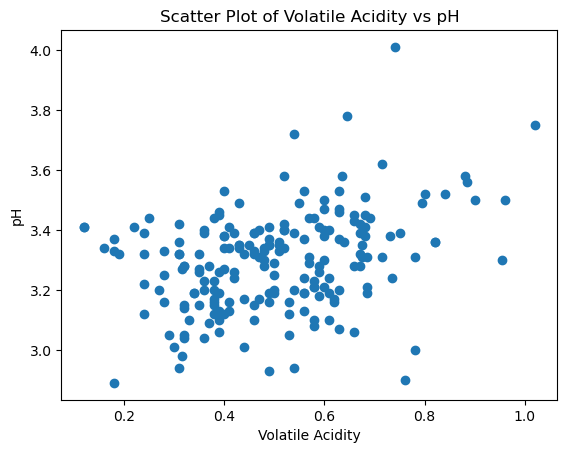

In [13]:
#visualising the relationship between the 2 variables volatile_acidxity and pH
plt.scatter(data1['volatile_acidity'], data1['pH'])

plt.xlabel('Volatile Acidity')
plt.ylabel('pH')
plt.title('Scatter Plot of Volatile Acidity vs pH')
plt.show()

In [14]:
#prepare to build the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#prepare the data for linear regression by separating the dependent and independent variables
x = data1[['volatile_acidity']] #independent variable
y = data1['pH'] #dependent variable

In [15]:
#using training and testing data (70% training and 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [16]:
#build the simple linear regression model
model = LinearRegression()
#fit the model on the training data
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
#interpret coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Intercept: {:.4f}".format(intercept))
print("Coefficient: {:.4f}".format(coefficients[0]))

Intercept: 3.1071
Coefficient: 0.3600


In [18]:
#predict the test set
y_pred = model.predict(x_test)

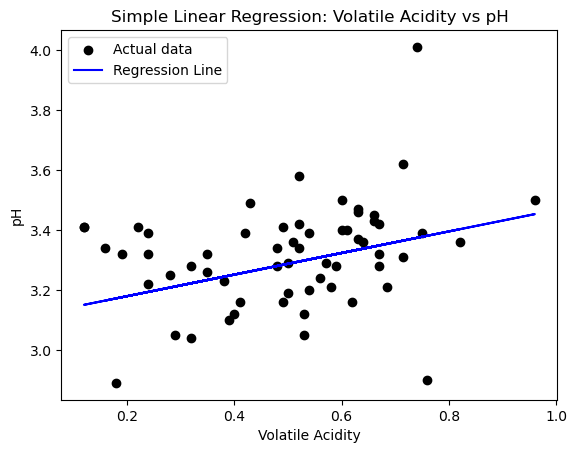

In [19]:
#visualise the regression line against the actual test data
plt.scatter(x_test, y_test, color='black', label='Actual data')
plt.plot(x_test, y_pred, color='blue', label='Regression Line')

plt.xlabel('Volatile Acidity')
plt.ylabel('pH')
plt.title('Simple Linear Regression: Volatile Acidity vs pH')
plt.legend()
plt.show()

In [20]:
#evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.4f}".format(r2))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))

R-squared: 0.0405
Root Mean Squared Error (RMSE): 0.1686
Mean Absolute Error (MAE): 0.1273


# Task 2: Classification

In [21]:
#load the csv data from the file containing the random sample for Task 2
data2 = pd.read_csv("s4160608-cleaned-A2SampleTwo.csv", sep=",", decimal = ".", header = 0)

In [ ]:
#exploring the target labels
data2['quality'].value_counts()

## kNN

In [23]:
#separate features (x) and target (y)
x = data2.drop('quality', axis=1) #drop the target column for features

#select the target class label
wineTarget = data2['quality']
y = wineTarget

In [24]:
#show the feature data
x

,volatile_acidity,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,0.40,6.0,20.0,3.28,0.57,12.5
1,0.61,11.0,65.0,3.54,0.58,9.3
2,0.36,22.0,71.0,2.98,0.84,14.9
3,0.74,5.0,10.0,3.28,0.57,11.8
4,0.45,3.0,6.0,3.13,0.63,10.4
...,...,...,...,...,...,...
995,0.26,11.0,27.0,3.21,0.80,9.4
996,0.98,20.0,49.0,3.31,0.55,9.7
997,0.50,19.0,49.0,3.35,0.78,9.5
998,0.26,6.0,10.0,3.33,0.87,10.9


In [25]:
#show the target labels
y

0      6.0
1      5.0
2      5.0
3      6.0
4      5.0
      ... 
995    6.0
996    3.0
997    5.0
998    6.0
999    5.0
Name: quality, Length: 1000, dtype: float64

In [26]:
#split the data into training and testing sets (70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 5)

In [27]:
#check the shapes of the training and testing sets
print(f"Training features shape: {x_train.shape}")
print(f"Testing features shape: {x_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (700, 6)
Testing features shape: (300, 6)
Training target shape: (700,)
Testing target shape: (300,)


In [28]:
#retrieve the count of the smallest class in the target labels to use as number of folds in cross-validation
smallest_class_count = y_train.value_counts().min()

In [29]:
#using k-fold cross-validation to find the optimal k value
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#range of k values to test
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
scores1 = []

#perform cross validation for each k
for k in k_values:
    knn1 = KNeighborsClassifier(n_neighbors=k) #create a kNN model
    cv_scores1 = cross_val_score(knn1, x_train, y_train, cv=smallest_class_count) #get cross-validation accuracy
    average_score1 = np.mean(cv_scores1) #average accuracy score across the 3 folds
    scores1.append(average_score1) #add the average accuracy score to the list
    print(f"k={k}, Cross-Validation Accuracy: {average_score1:.4f}")

k=1, Cross-Validation Accuracy: 0.5271
k=3, Cross-Validation Accuracy: 0.4886
k=5, Cross-Validation Accuracy: 0.5071
k=7, Cross-Validation Accuracy: 0.5114
k=9, Cross-Validation Accuracy: 0.5214
k=11, Cross-Validation Accuracy: 0.5257
k=13, Cross-Validation Accuracy: 0.5286
k=15, Cross-Validation Accuracy: 0.5286
k=17, Cross-Validation Accuracy: 0.5386
k=19, Cross-Validation Accuracy: 0.5357
k=21, Cross-Validation Accuracy: 0.5357
k=23, Cross-Validation Accuracy: 0.5243
k=25, Cross-Validation Accuracy: 0.5214
k=27, Cross-Validation Accuracy: 0.5200
k=29, Cross-Validation Accuracy: 0.5043
k=31, Cross-Validation Accuracy: 0.4971


In [30]:
#adjusting the kNN model with the optimal k value of 17 and using distance weighting
scores2 = []
knn2 = KNeighborsClassifier(n_neighbors=17, weights='distance')
cv_scores2 = cross_val_score(knn2, x_train, y_train, cv=4) 
average_score2 = np.mean(cv_scores2) 
scores2.append(average_score2)
print(f"Cross-Validation Accuracy: {average_score2:.4f}")

Cross-Validation Accuracy: 0.5871


In [31]:
#adjusting the kNN model with the optimal k value of 17, using distance weighting and Manhattan distance (p=1)
scores3 = []
knn3 = KNeighborsClassifier(n_neighbors=17, weights='distance', p=1)
cv_scores3 = cross_val_score(knn3, x_train, y_train, cv=4) 
average_score3 = np.mean(cv_scores3) 
scores3.append(average_score3)
print(f"Cross-Validation Accuracy: {average_score3:.4f}")

Cross-Validation Accuracy: 0.5843


In [32]:
#build and train the final model
knn = KNeighborsClassifier(n_neighbors=17, weights='distance')
fit = knn.fit(x_train, y_train)

In [33]:
#generate predictions from the test set using the trained model
y_pre = fit.predict(x_test)

In [34]:
#confusion matrix - kNN
from sklearn.metrics import confusion_matrix

cm_labels = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
cm = confusion_matrix(y_test, y_pre, labels=cm_labels)
cm_df = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)
print(cm_df)

     3.0  4.0  5.0  6.0  7.0  8.0
3.0    0    0    1    0    0    0
4.0    0    0    6    7    0    0
5.0    0    0   87   44    3    0
6.0    0    0   49   63    3    1
7.0    0    0    8   18    9    0
8.0    0    0    0    1    0    0


In [35]:
#classification report - kNN
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre, zero_division=0))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        13
         5.0       0.58      0.65      0.61       134
         6.0       0.47      0.54      0.51       116
         7.0       0.60      0.26      0.36        35
         8.0       0.00      0.00      0.00         1

    accuracy                           0.53       300
   macro avg       0.27      0.24      0.25       300
weighted avg       0.51      0.53      0.51       300



## Modified kNN 

In [36]:
#modify kNN using hill climbing feature selection

from sklearn.utils import shuffle
new_Ind = [] #an empty list to store selected feature indices
cur_MaxScore = 0.0 #stores the best score achieved so far
col_num = 6 #the total number of features

#shuffle features
col_Ind_Random = shuffle(range(0, col_num), random_state = 5) 

#iterate over each feature index in the shuffled list
for cur_f in range(0, col_num):
    #append feature index to new_Ind
    new_Ind.append(col_Ind_Random[cur_f])
    #create a subset of the data using the currently selected features from new_Ind
    newData = x.iloc[:, new_Ind]
    #split the data subset into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(newData, y, test_size=0.3, random_state=5)
    #use the kNN model with k=17 and distance weighting to evaluate the feature subset
    clf = KNeighborsClassifier(17, weights='distance')
    #fit the model
    fit = clf.fit(x_train, y_train)
    #calculate accuracy score
    cur_Score = clf.score(x_test, y_test)
    #if cur_Score is lower than cur_MaxScore, the recently added feature is removed from new_Ind
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    #otherwise cur_MaxScore is updated to cur_Score
    else:
        cur_MaxScore = cur_Score
        print("Score with {} selected features: {:.4f}".format(len(new_Ind), cur_Score))

Score with 1 selected features: 0.5667
Score with 2 selected features: 0.6100
Score with 3 selected features: 0.6533
Score with 4 selected features: 0.6633


In [37]:
#select and show the final selected features
x_selected = x.iloc[:, new_Ind]
print(x_selected)

     alcohol  sulphates  volatile_acidity    pH
0       12.5       0.57              0.40  3.28
1        9.3       0.58              0.61  3.54
2       14.9       0.84              0.36  2.98
3       11.8       0.57              0.74  3.28
4       10.4       0.63              0.45  3.13
..       ...        ...               ...   ...
995      9.4       0.80              0.26  3.21
996      9.7       0.55              0.98  3.31
997      9.5       0.78              0.50  3.35
998     10.9       0.87              0.26  3.33
999      9.8       0.53              0.60  3.15

[1000 rows x 4 columns]


In [38]:
#split the data into training and testing sets using only the selected features
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.3, random_state=5)

In [39]:
#build the modified kNN model
knn_mod = KNeighborsClassifier(n_neighbors=17, weights='distance')
#fit the model
knn_mod.fit(x_train, y_train)

,n_neighbors,17
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
#generate predictions from the test set using the trained modified model
y_pred = knn_mod.predict(x_test)

In [41]:
#confusion matrix for the modified model
cm_mod = confusion_matrix(y_test, y_pred)
cm_moddf = pd.DataFrame(cm_mod, index=cm_labels, columns=cm_labels)
print(cm_moddf)

     3.0  4.0  5.0  6.0  7.0  8.0
3.0    0    0    1    0    0    0
4.0    0    0    9    4    0    0
5.0    0    0  101   32    1    0
6.0    0    0   30   81    5    0
7.0    0    0    2   16   17    0
8.0    0    0    0    0    1    0


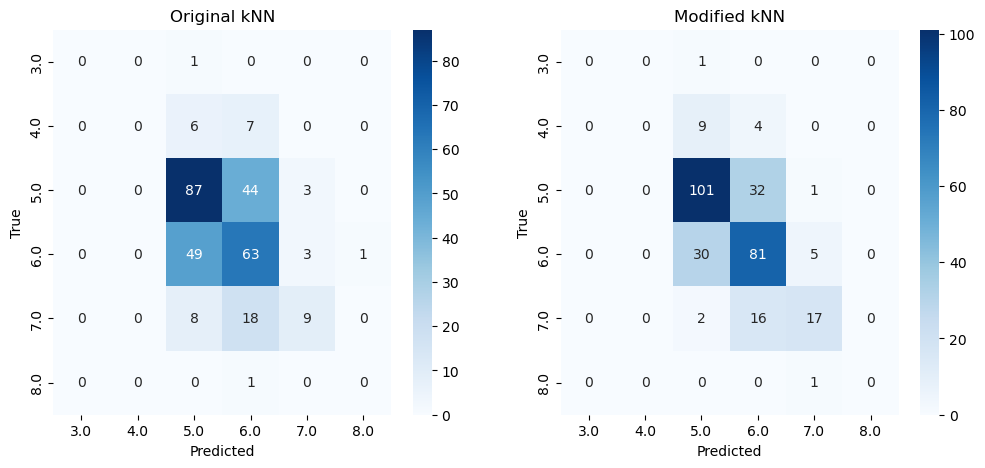

In [42]:
#comparing confusion matrices of original and modified models
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#define the actual class labels
class_labels = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

# plot confusion matrix heatmap for original kNN
sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[0], xticklabels=class_labels, yticklabels=class_labels)
axes[0].set_title('Original kNN')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# plot confusion matrix heatmap for modified kNN
sns.heatmap(cm_mod, annot=True, fmt="d", cmap='Blues', ax=axes[1], xticklabels=class_labels, yticklabels=class_labels)
axes[1].set_title('Modified kNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.show()

In [43]:
#classification report for the modified model
cr = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        13
         5.0       0.71      0.75      0.73       134
         6.0       0.61      0.70      0.65       116
         7.0       0.71      0.49      0.58        35
         8.0       0.00      0.00      0.00         1

    accuracy                           0.66       300
   macro avg       0.34      0.32      0.33       300
weighted avg       0.63      0.66      0.64       300



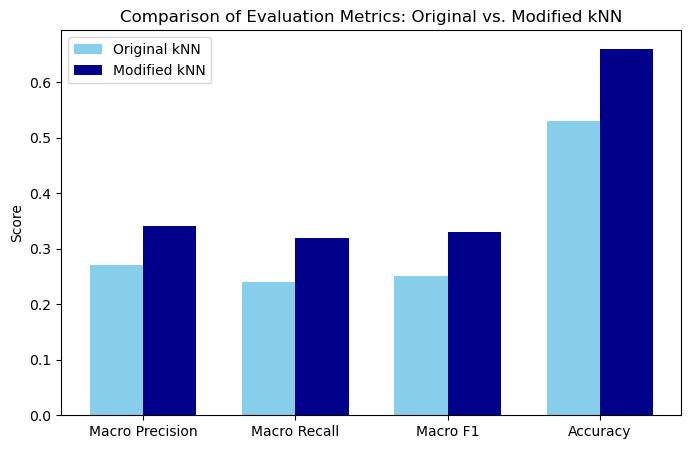

In [44]:
#Visual comparison of evaluation metrics between original and modified kNN models
metrics = ["Macro Precision", "Macro Recall", "Macro F1", "Accuracy"]
# Original kNN
original_scores = [0.27, 0.24, 0.25, 0.53] 
# Modified kNN  
modified_scores = [0.34, 0.32, 0.33, 0.66]   

x_point = np.arange(len(metrics))  
# width of bars
width = 0.35                 

#create figure and axes
fig, ax = plt.subplots(figsize=(8,5))
#create bar charts
bars1 = ax.bar(x_point - width/2, original_scores, width, label='Original kNN', color='skyblue')
bars2 = ax.bar(x_point + width/2, modified_scores, width, label='Modified kNN', color='darkblue')

# Add labels & title
ax.set_ylabel("Score")
ax.set_xticks(x_point)
ax.set_xticklabels(metrics)
ax.set_title("Comparison of Evaluation Metrics: Original vs. Modified kNN")
ax.legend()

plt.show()


## Decision Tree & comparison

In [45]:
#basic decision tree
from sklearn.tree import DecisionTreeClassifier
#build the decision tree model
clf = DecisionTreeClassifier(random_state=1)
#fit the model
fit = clf.fit(x_train, y_train)

#predict the test set
y_pre = fit.predict(x_test)

#calculate accuracy score using cross-validation
scores = cross_val_score(clf, x_train, y_train, cv=smallest_class_count)
#calculate the mean accuracy score
mean_score = np.mean(scores)

print("Average accuracy score of basic decision tree: {:.4f}".format(mean_score))

Average accuracy score of basic decision tree: 0.5186


In [46]:
#tune max_depth

#depth values to test
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
#store the best depth value with highest accuracy score
best_depth = None
#store highest accuracy score
best_score = 0

for d in depth_values:
    clf = DecisionTreeClassifier(max_depth=d,random_state=1)
    scores = cross_val_score(clf, x_train, y_train, cv=smallest_class_count)
    mean_score = np.mean(scores)
    print(f"max_depth={d}, CV: {mean_score:.4f}")
    
    #update best_score to mean_score if it is higher
    if mean_score > best_score:
        best_score = mean_score
        best_depth = d

print(f"Best max_depth: {best_depth} with CV: {best_score:.4f}")


max_depth=1, CV: 0.5671
max_depth=2, CV: 0.5571
max_depth=3, CV: 0.5657
max_depth=4, CV: 0.5786
max_depth=5, CV: 0.5671
max_depth=6, CV: 0.5300
max_depth=7, CV: 0.5543
max_depth=8, CV: 0.5543
max_depth=9, CV: 0.5543
max_depth=10, CV: 0.5400
max_depth=None, CV: 0.5186
Best max_depth: 4 with CV: 0.5786


In [47]:
#tune min samples split
split_values = [2, 5, 10, 15, 20]
best_split = None
best_score = 0

for s in split_values:
    #max_depth is set to the best value found in the previous step (4)
    clf = DecisionTreeClassifier(
        max_depth=best_depth, 
        min_samples_split=s, 
        random_state=1)
    scores = cross_val_score(clf, x_train, y_train, cv=smallest_class_count)
    mean_score = np.mean(scores)
    print(f"min_samples_split={s}, CV: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_split = s

print(f"Best min_samples_split: {best_split} with CV: {best_score:.4f}")

min_samples_split=2, CV: 0.5786
min_samples_split=5, CV: 0.5786
min_samples_split=10, CV: 0.5771
min_samples_split=15, CV: 0.5757
min_samples_split=20, CV: 0.5757
Best min_samples_split: 2 with CV: 0.5786


In [48]:
#tune min samples leaf
leaf_values = [1, 5, 10, 15, 20]
best_leaf = None
best_score = 0

for l in leaf_values:
    #max depth is set to the best depth value (4) found and now min_samples_split is set to 5
    clf = DecisionTreeClassifier(
        max_depth=best_depth, 
        min_samples_split=5, 
        min_samples_leaf=l, 
        random_state=1)
    scores = cross_val_score(clf, x_train, y_train, cv=smallest_class_count)
    mean_score = np.mean(scores)
    print(f"min_samples_leaf={l}, CV: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_leaf = l

print(f"Best min_samples_leaf: {best_leaf} with CV: {best_score:.4f}")

min_samples_leaf=1, CV: 0.5786
min_samples_leaf=5, CV: 0.5829
min_samples_leaf=10, CV: 0.5771
min_samples_leaf=15, CV: 0.5686
min_samples_leaf=20, CV: 0.5614
Best min_samples_leaf: 5 with CV: 0.5829


In [49]:
#tune max features
feature_values = [1, 2, 3, 4, 5, 6, None]
best_features = None
best_score = 0

for f in feature_values:
    #max_depth, min_samples_split and min_samples leaf are set to the values determined above
    clf = DecisionTreeClassifier(
        min_samples_split=best_split,
        min_samples_leaf=5,
        max_depth=best_depth,
        max_features=f,
        random_state=1
    )
    scores = cross_val_score(clf, x_train, y_train, cv=smallest_class_count )
    mean_score = np.mean(scores)
    print(f"max_features={f}, CV: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_features = f

print(f"Best max_features: {best_features} with CV: {best_score:.4f}")

max_features=1, CV: 0.5814
max_features=2, CV: 0.5557
max_features=3, CV: 0.5700
max_features=4, CV: 0.5829
max_features=5, CV: 0.5829
max_features=6, CV: 0.5829
max_features=None, CV: 0.5829
Best max_features: 4 with CV: 0.5829


In [50]:
#final decision tree with tuned parameters

clf = DecisionTreeClassifier(
        max_depth=4,
        min_samples_split=5,
        min_samples_leaf=5,     
        max_features=4,
        random_state=1)
fit = clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_train, y_train, cv=smallest_class_count)
mean_score = np.mean(scores)

print("Average accuracy score of tuned decision tree: {:.4f}".format(mean_score))

Average accuracy score of tuned decision tree: 0.5829


In [51]:
#decision tree classification report
y_pre = fit.predict(x_test)
print(classification_report(y_test, y_pre, zero_division=0))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        13
         5.0       0.57      0.71      0.63       134
         6.0       0.50      0.50      0.50       116
         7.0       0.56      0.29      0.38        35
         8.0       0.00      0.00      0.00         1

    accuracy                           0.54       300
   macro avg       0.27      0.25      0.25       300
weighted avg       0.51      0.54      0.52       300



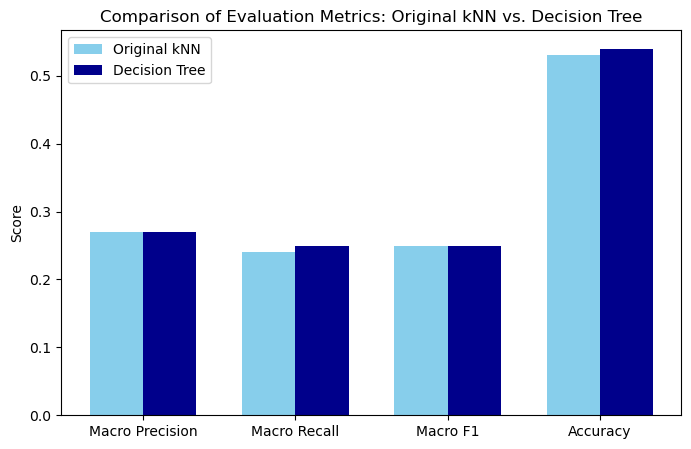

In [52]:
#Visual comparison of evaluation metrics between original kNN model and decision tree
metrics = ["Macro Precision", "Macro Recall", "Macro F1", "Accuracy"]
# Original kNN
original_scores = [0.27, 0.24, 0.25, 0.53] 
# Decision Tree 
modified_scores = [0.27, 0.25, 0.25, 0.54]   

x_point = np.arange(len(metrics))  
# width of bars
width = 0.35                 

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x_point - width/2, original_scores, width, label='Original kNN', color='skyblue')
bars2 = ax.bar(x_point + width/2, modified_scores, width, label='Decision Tree', color='darkblue')

# Add labels & title
ax.set_ylabel("Score")
ax.set_xticks(x_point)
ax.set_xticklabels(metrics)
ax.set_title("Comparison of Evaluation Metrics: Original kNN vs. Decision Tree")
ax.legend()

plt.show()


# Task 3: Clustering

In [53]:
#load the csv data from the file containing the sample data for task 3
data3 = pd.read_csv("s4160608-cleaned-A2SampleThree.csv", sep=",", decimal = ".", header = 0)

## k-Means 

In [54]:
#exploring the distribution of the target classes
data3['quality'].value_counts()

quality
5.0    280
6.0    218
7.0     75
4.0     19
8.0      7
3.0      1
Name: count, dtype: int64

In [55]:
#limit number of threads
import os

os.environ['OMP_NUM_THREADS'] = '3'

In [56]:
#extract features only
x = data3.drop("quality", axis=1)
#extract target labels
y = data3['quality']

In [57]:
#explore the impact of different k values on performance
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    adjusted_rand_score,
    mutual_info_score
)
from sklearn.cluster import KMeans

#create list to store evaluation metric results
results = []

# Range of k values to test
k_values = range(2, 11)  

for k in k_values:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(x)
    
    # Internal metrics 
    silhouette = silhouette_score(x, labels)
    davies_bouldin = davies_bouldin_score(x, labels)
    
    # External metrics (compare to true y)
    ari = adjusted_rand_score(y, labels)
    mi = mutual_info_score(y, labels)
    
    results.append({
        "k": k,
        "Silhouette": silhouette,
        "Davies-Bouldin": davies_bouldin,
        "ARI": ari,
        "MI": mi,
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results)



    k  Silhouette  Davies-Bouldin       ARI        MI
0   2    0.595505        0.620267 -0.009659  0.036651
1   3    0.521117        0.652146 -0.009606  0.038070
2   4    0.494405        0.694039 -0.008434  0.061878
3   5    0.452865        0.735238 -0.003684  0.064673
4   6    0.434310        0.865193 -0.007373  0.069415
5   7    0.404476        0.943323 -0.008922  0.064224
6   8    0.413442        0.886877 -0.000095  0.075524
7   9    0.415672        0.877204 -0.002067  0.075131
8  10    0.435927        0.723962 -0.005061  0.078113


In [58]:
#implement k means with k=6
km1 = KMeans(n_clusters=6, random_state=1) 
#fit the model
labels1 = km1.fit(x).labels_

In [59]:
#evaluation metrics for k means with k=6
silhouette = silhouette_score(x, labels1)
davies_bouldin = davies_bouldin_score(x, labels1)
ari = adjusted_rand_score(y, labels1)
mi = mutual_info_score(y, labels1)

print("Silhouette Score: {:.4f}".format(silhouette))
print("Davies-Bouldin Score: {:.4f}".format(davies_bouldin))
print("Adjusted Rand Score (ARI): {:.4f}".format(ari))
print("Mutual Info Score: {:.4f}".format(mi))

Silhouette Score: 0.4343
Davies-Bouldin Score: 0.8652
Adjusted Rand Score (ARI): -0.0074
Mutual Info Score: 0.0694


## DBSCAN & comparison 

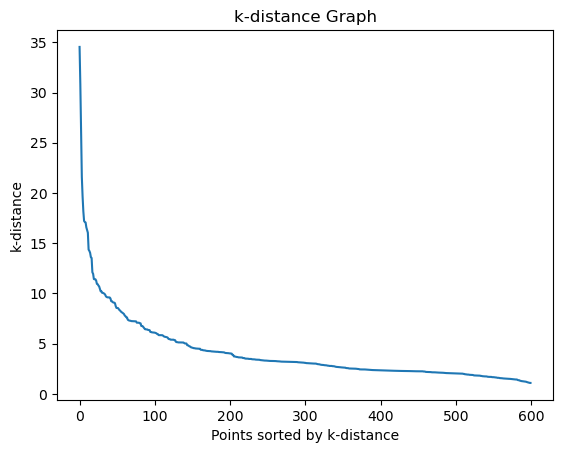

In [60]:
#select Eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

#initialise the NearestNeighbors model and fit to the data x
nbrs = NearestNeighbors().fit(x)

#find the 20 nearest neighbours for each point in x
distances, indices = nbrs.kneighbors(x, 20)

#selects the distance to the 7th nearest neighbor as minPts = 7
kDis = distances[:,8]

#sort the distances in ascending order
kDis.sort()

#reverses the order of the distances
kDis = kDis[::-1]

#plot the k-distance graph
plt.plot(range(0, len(kDis)), kDis)
plt.title("k-distance Graph")
plt.xlabel("Points sorted by k-distance")
plt.ylabel("k-distance")
plt.show()

In [61]:
#test eps values

#create list to store evaluation metric results
results = []

# Range of eps values to test
eps_values = range(5, 11) 

for e in eps_values:
    #set minPts to 7
    dbs_1 = DBSCAN(eps=e, min_samples=7)
    #assign each data point a cluster label
    labels = dbs_1.fit_predict(x)
    
    # Internal metrics 
    silhouette = silhouette_score(x, labels)
    davies_bouldin = davies_bouldin_score(x, labels)
    
    # External metrics (compare to true y)
    ari = adjusted_rand_score(y, labels)
    mi = mutual_info_score(y, labels)
    
    results.append({
        "Eps": e,
        "Silhouette": silhouette,
        "Davies-Bouldin": davies_bouldin,
        "ARI": ari,
        "MI": mi,
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results)

   Eps  Silhouette  Davies-Bouldin       ARI        MI
0    5    0.273608        1.842548 -0.033889  0.040240
1    6    0.566239        0.612530 -0.025335  0.018235
2    7    0.482477        4.743682 -0.028212  0.031088
3    8    0.519515        2.100530 -0.027400  0.027817
4    9    0.477641        0.823079 -0.006529  0.003912
5   10    0.444625        0.759713 -0.004582  0.003838


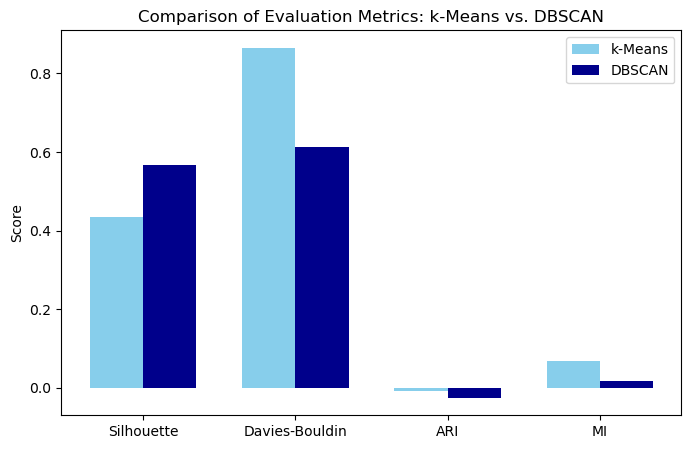

In [62]:
#Visual comparison of evaluation metrics between k-Means and DBSCAN
metrics = ["Silhouette", "Davies-Bouldin", "ARI", "MI"]
# k-Means
kmean_scores = [0.4343, 0.8652, -0.0074 , 0.0694] 
# DBSCAN
dbscan_scores = [0.566239, 0.612530, -0.025335, 0.018235]   

x_point = np.arange(len(metrics))  
# width of bars
width = 0.35      

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x_point - width/2, kmean_scores, width, label='k-Means', color='skyblue')
bars2 = ax.bar(x_point + width/2, dbscan_scores, width, label='DBSCAN', color='darkblue')

# Add labels & title
ax.set_ylabel("Score")
ax.set_xticks(x_point)
ax.set_xticklabels(metrics)
ax.set_title("Comparison of Evaluation Metrics: k-Means vs. DBSCAN")
ax.legend()

plt.show()
